# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
matplotlib.__version__

'3.2.2'

In [ ]:
# !pip3 install --upgrade matplotlib

In [ ]:
churn_data = pd.read_csv('/content/drive/MyDrive/Dataset/churn_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Description about the data.
There are only three feature that are in numeric form

In [ ]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Total 21 columns, where 17 of them are categorical (object data type) columns excluding the 'customrID' column, as it doesn't have any importance. 3 numeric columns 2 of the are in 'int64' data type and 1 in 'float64' data type. The 'churn' column is the target variable. A categorical column consiting 'yes' as the customer churned (left the company) and 'no' as the customer did not churn (stays in the company) 

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


unique values that each feature holds, this was mainly done for the catgorical columns to observe how many categories each holds

In [ ]:
for col in churn_data.columns[1:]:
    print("Unique values in '{}':\n".format(col), churn_data[col].unique())

Unique values in 'gender':
 ['Female' 'Male']
Unique values in 'SeniorCitizen':
 [0 1]
Unique values in 'Partner':
 ['Yes' 'No']
Unique values in 'Dependents':
 ['No' 'Yes']
Unique values in 'tenure':
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService':
 ['No' 'Yes']
Unique values in 'MultipleLines':
 ['No phone service' 'No' 'Yes']
Unique values in 'InternetService':
 ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity':
 ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup':
 ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection':
 ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport':
 ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV':
 ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies':
 ['No' 'Yes

No null values.

In [ ]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
categoricals = []
numericals = []

for col in churn_data.columns[1:]:
    if churn_data[col].dtype == 'float64' or churn_data[col].dtype == 'int64':
        numericals.append(col)
    else:
        categoricals.append(col)

In [ ]:
# only three numeic features

numericals

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [ ]:
categoricals

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [ ]:
# 17 categorical features, excluding the customerID

len(categoricals)

17

In [ ]:
binary_cols = [col for col in categoricals if churn_data[col].nunique() == 2]
three_some_cols = [col for col in categoricals if churn_data[col].nunique() == 3]

In [ ]:
three_some_cols 

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

In [ ]:
# 9 categorical features that has 3 categories

len(three_some_cols)

9

In [ ]:
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [ ]:
more_some_cols = [col for col in categoricals if churn_data[col].nunique() > 3]

In [ ]:
more_some_cols

['PaymentMethod', 'TotalCharges']

In [ ]:
# the TotalcCharges is mistyped as a categorical variable. need to fix that

churn_data['TotalCharges'].nunique()

6531

The TotalCharges column had numerical data mistyped as strings, it also had several rows without any values. In order to fix those we need their poistions and put some values.

In [ ]:
indices = churn_data[churn_data['TotalCharges'] == ' '].index

In [ ]:
for i in indices:
    churn_data['TotalCharges'][i] = '0' 

<ipython-input-50-c47ccc67b020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['TotalCharges'][i] = '0'


In [ ]:
churn_data[churn_data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype('float')

In [ ]:
churn_data[['TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [ ]:
indices = churn_data[churn_data['TotalCharges'] == 0].index

These are the indices where we replaced the empty rows of TotalCharges with the value 0

In [ ]:
indices

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:


# for x in churn_data['TotalCharges']:
#     print(x)

In [ ]:
churn_data['PaymentMethod'].nunique()

4

First, we drop the CustomerID column

In [ ]:
churn_data.drop('customerID', axis=1, inplace=True)

In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.to_csv('/content/drive/MyDrive/Dataset/churn_data/Telco-Customer-Churn.csv', index=False)

# Import the data from here 

In [3]:
churn_data = pd.read_csv('/content/drive/MyDrive/Dataset/churn_data/Telco-Customer-Churn.csv')

In [4]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

we encoded the churn (target) column with LabelEncoder, the value 0 represents 'no' and 1 represents 'yes'

In [6]:
# create an instance of the LabelEncoder class

le = LabelEncoder()

class_encoded = le.fit_transform(churn_data['Churn'])
churn_data['churn_encoded'] = class_encoded
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_encoded
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [7]:
churn_data_x, churn_data_y = churn_data.drop(['Churn', 'churn_encoded'], axis=1), churn_data['churn_encoded']

In [8]:
churn_data_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [9]:
churn_data_y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn_encoded, Length: 7043, dtype: int64

Let's split the daaset

In [10]:
X_train_val, X_val, y_train_val, y_val = train_test_split(churn_data_x, churn_data_y, test_size=0.1, random_state=42)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [12]:
print("X_train shape is {}".format(X_train.shape))
print("X_test shape  is {}".format(X_test.shape))
print("y_train shape is {}".format(y_train.shape))
print("y_test shape is {}".format(y_test.shape))

X_train shape is (5704, 19)
X_test shape  is (634, 19)
y_train shape is (5704,)
y_test shape is (634,)


In [13]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3124,Male,0,Yes,Yes,68,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),82.85,5776.45
4147,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901.00
3188,Female,0,No,No,8,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,49.85,365.55
4788,Male,0,No,No,59,Yes,Yes,DSL,No,No,Yes,No,No,No,Two year,No,Credit card (automatic),54.15,3116.15
2126,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.45,44.45


In [14]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5704.000000,5704.000000,5704.000000,5704.000000
mean,0.160589,32.365358,64.681425,2274.779865
std,0.367184,24.531502,30.185975,2265.277568
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.337500,395.412500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,55.000000,89.912500,3785.900000
max,1.000000,72.000000,118.750000,8672.450000


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704 entries, 3124 to 4756
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5704 non-null   object 
 1   SeniorCitizen     5704 non-null   int64  
 2   Partner           5704 non-null   object 
 3   Dependents        5704 non-null   object 
 4   tenure            5704 non-null   int64  
 5   PhoneService      5704 non-null   object 
 6   MultipleLines     5704 non-null   object 
 7   InternetService   5704 non-null   object 
 8   OnlineSecurity    5704 non-null   object 
 9   OnlineBackup      5704 non-null   object 
 10  DeviceProtection  5704 non-null   object 
 11  TechSupport       5704 non-null   object 
 12  StreamingTV       5704 non-null   object 
 13  StreamingMovies   5704 non-null   object 
 14  Contract          5704 non-null   object 
 15  PaperlessBilling  5704 non-null   object 
 16  PaymentMethod     5704 non-null   objec

In [16]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [17]:
for col in X_train.columns:
    print("Unique values in '{}':\n".format(col), X_train[col].unique())

Unique values in 'gender':
 ['Male' 'Female']
Unique values in 'SeniorCitizen':
 [0 1]
Unique values in 'Partner':
 ['Yes' 'No']
Unique values in 'Dependents':
 ['Yes' 'No']
Unique values in 'tenure':
 [68 71  8 59  1 72 42 22 18 13 12  2 19 66 32 61 36 25 33 11 21 63  4 46
 67 47 14 58  6 69  5 31 27  3 24 23 45 39 10 17  7 29 49 20 57 43 53 35
 56  9 51 26 34 40 52 62 60 70 37 55 44 16 41 50 64 65 48 30 15 54 28 38
  0]
Unique values in 'PhoneService':
 ['Yes' 'No']
Unique values in 'MultipleLines':
 ['No' 'Yes' 'No phone service']
Unique values in 'InternetService':
 ['DSL' 'No' 'Fiber optic']
Unique values in 'OnlineSecurity':
 ['Yes' 'No internet service' 'No']
Unique values in 'OnlineBackup':
 ['Yes' 'No internet service' 'No']
Unique values in 'DeviceProtection':
 ['No' 'No internet service' 'Yes']
Unique values in 'TechSupport':
 ['Yes' 'No internet service' 'No']
Unique values in 'StreamingTV':
 ['Yes' 'No internet service' 'No']
Unique values in 'StreamingMovies':
 ['Yes' 'No

In [18]:
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [19]:
categoricals = []
numericals = []

for col in X_train.columns[1:]:
    if X_train[col].dtype == 'float64' or X_train[col].dtype == 'int64':
        numericals.append(col)
    else:
        categoricals.append(col)

In [20]:
print(categoricals)
print("--"*40)
print(numericals)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
--------------------------------------------------------------------------------
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


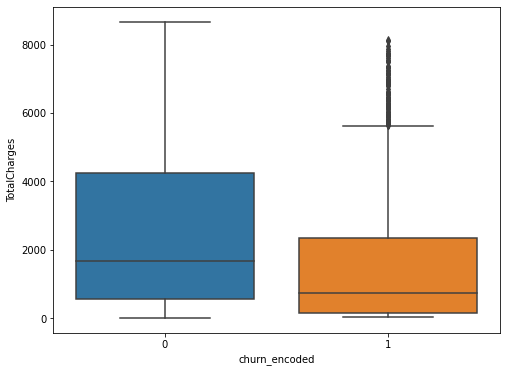

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train, y=X_train['TotalCharges'])
plt.show()

In [22]:
for n in numericals:
    print("Correlation of {} with target is {}".format(n, X_train[n].corr(y_train)))

Correlation of SeniorCitizen with target is 0.14821362054704082
Correlation of tenure with target is -0.34744115639154866
Correlation of MonthlyCharges with target is 0.19123734072755322
Correlation of TotalCharges with target is -0.19486711472063786


Correlation between the numerical features with each other

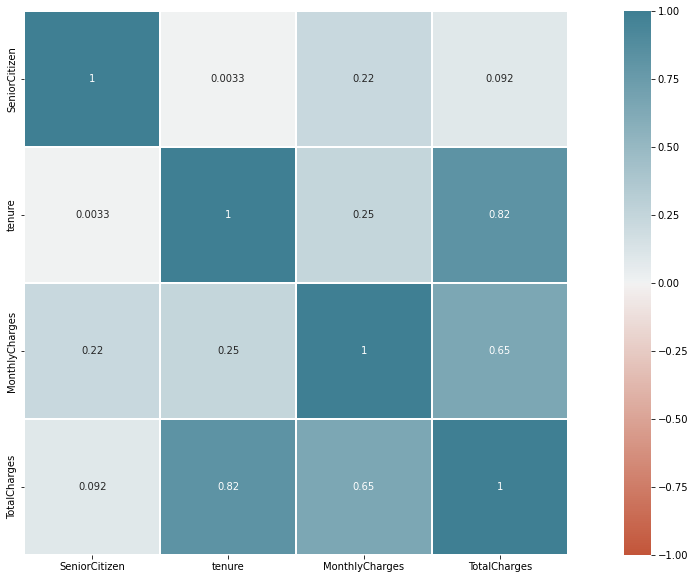

In [23]:
plt.figure(figsize=(20, 10))

sns.heatmap(X_train.corr(), annot=True, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            linewidth=1, square=True)
plt.show()

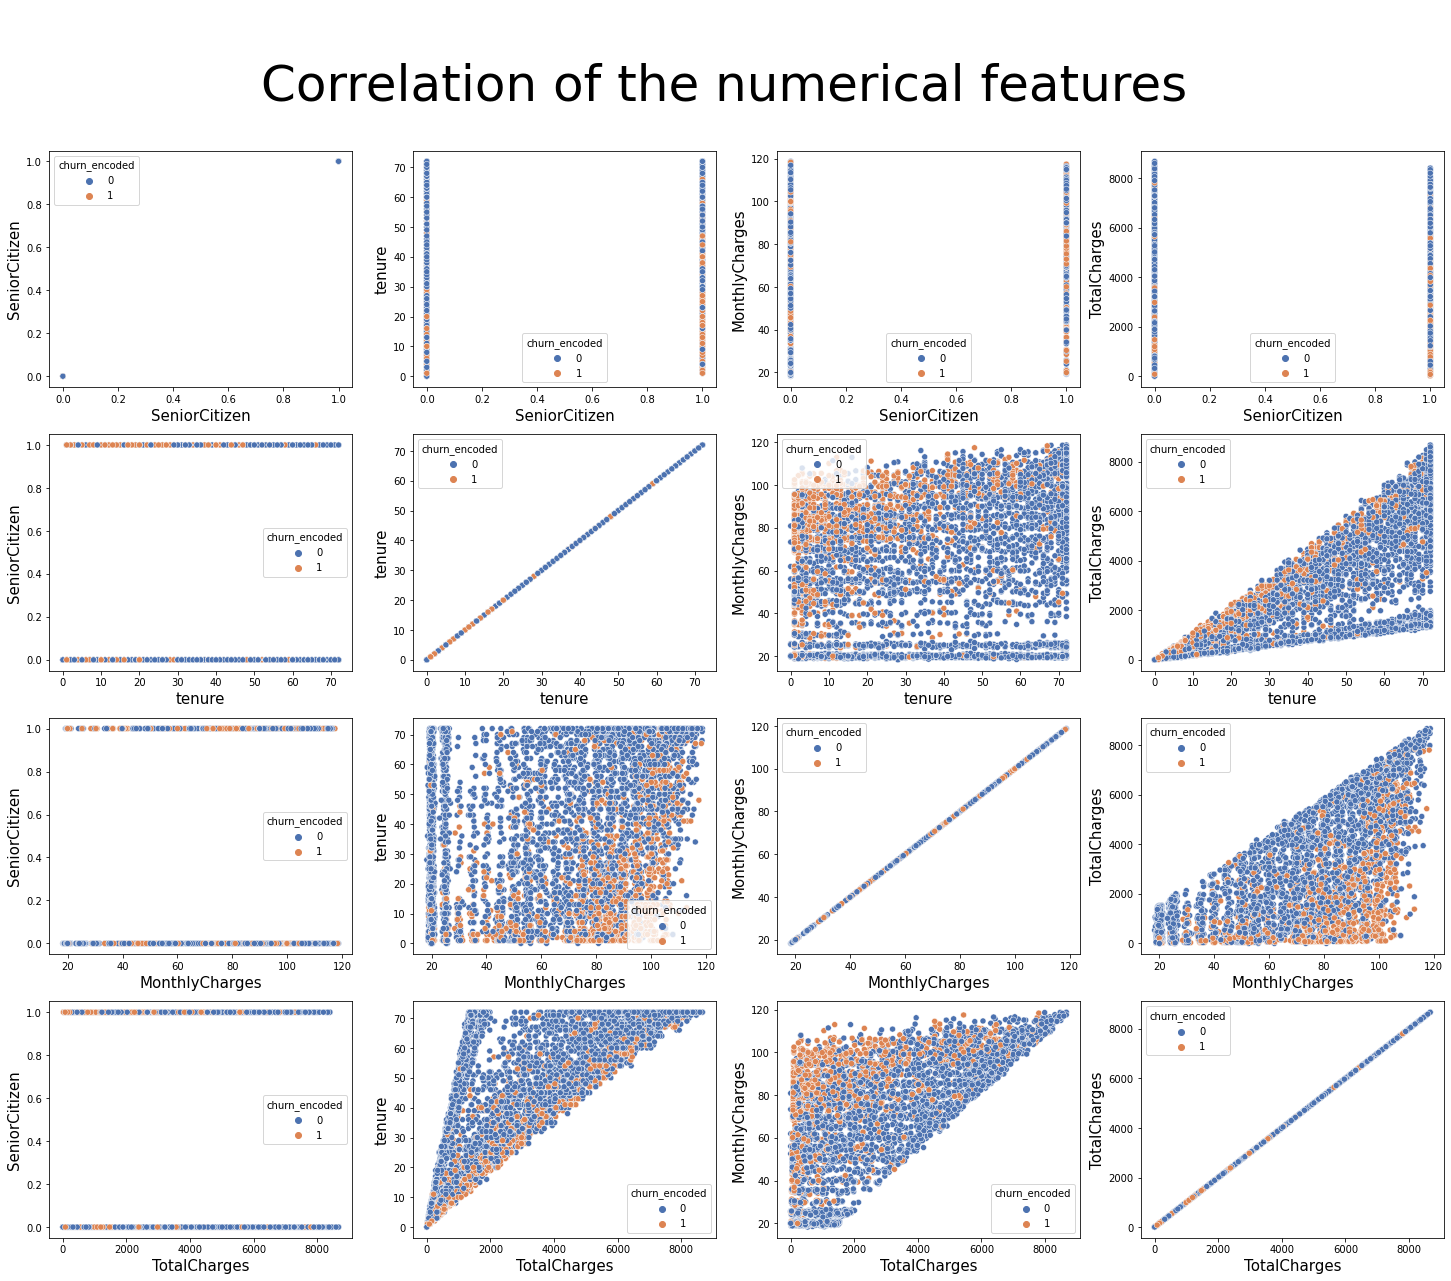

In [24]:
n_rows, n_cols = (4, 4)    # define number of rows and number of cols of the figure
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 20))
figure.suptitle("\nCorrelation of the numerical features\n", fontsize=50)

for i, cols in enumerate(numericals):
    for j, jcols in enumerate(numericals):
        fig = sns.scatterplot(data=X_train, x=cols, y=jcols, ax=axes[i, j], 
                              hue=y_train, palette='deep')
        axes[i, j].set_xlabel(cols, fontsize=15)
        axes[i, j].set_ylabel(jcols, fontsize=15)

plt.show()


>>> In the **above** **figure**, *Tenure* and the *TotalCharges* features are the most correlated numerical features to each other, MonthlyCharges and TotalCharges has some correlation too (this was also visible from the heatmap), but other than that there are almost none with the other features.

significance test for the numerical columns with the target columns

In [25]:
numericals.remove('SeniorCitizen')

In [26]:
numericals

['tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
categoricals

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [28]:
categoricals.append('SeniorCitizen')
categoricals

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

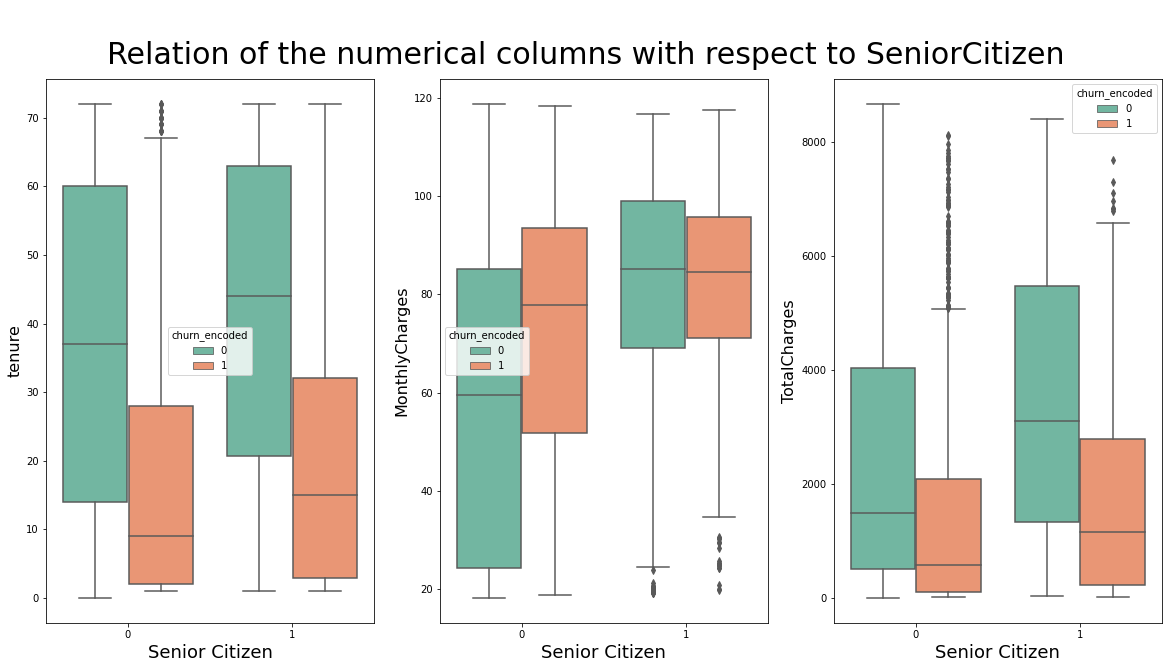

In [29]:
n_rows, n_cols = (1, 3)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))
figure.suptitle('\nRelation of the numerical columns with respect to SeniorCitizen\n', fontsize=30)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(numericals):
    fig = sns.boxplot(x=X_train['SeniorCitizen'], y=X_train[cols], ax=axes[j],
                      palette=sns.color_palette("Set2"), hue=y_train)
    axes[j].set_xlabel('Senior Citizen', fontsize=18)
    axes[j].set_ylabel(cols, fontsize=16)

plt.show()

In [37]:
# for j, cols in enumerate(numericals):
#     print(j, cols)

In [38]:
# numericals

## Creating a copy of the X_train data to do more analysis, we're gonna name it train_data

In [32]:
X_train['SeniorCitizen'].unique()

array([0, 1])

In [33]:
train_data = X_train.copy()    # copying the X_train data to train_data variable

In [34]:
train_data['churn'] = y_train.copy()

In [35]:
train_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
3124,Male,0,Yes,Yes,68,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),82.85,5776.45,0
4147,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901.00,0
3188,Female,0,No,No,8,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,49.85,365.55,1
4788,Male,0,No,No,59,Yes,Yes,DSL,No,No,Yes,No,No,No,Two year,No,Credit card (automatic),54.15,3116.15,0
2126,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.45,44.45,0
449,Male,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),105.50,7611.55,0
28,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,0
4260,Male,0,Yes,Yes,42,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,73.15,3088.25,0
864,Male,0,No,No,22,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.65,2104.55,1
1417,Female,1,No,No,18,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.85,865.75,0


In [36]:
print(categoricals)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [39]:
binary_cats = []
ternary_cats = []
multiple_cats = []


for col_name in categoricals:
    if train_data[col_name].nunique() == 2:
        binary_cats.append(col_name)
    elif train_data[col_name].nunique() == 3:
        ternary_cats.append(col_name)
    else:
        multiple_cats.append(col_name)


In [40]:
print("These are binary cats with the length {}: \n{}".format(len(binary_cats), binary_cats))
print("\n")
print("These are ternary cats with the length {}: \n{}".format(len(ternary_cats), ternary_cats))
print("\n")
print("These are mutlitple cats with the length {}: \n{}".format(len(multiple_cats), multiple_cats))
print("\n")
print("These are numericals features with the length {}: \n{}".format(len(numericals), numericals))

These are binary cats with the length 5: 
['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']


These are ternary cats with the length 9: 
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']


These are mutlitple cats with the length 1: 
['PaymentMethod']


These are numericals features with the length 3: 
['tenure', 'MonthlyCharges', 'TotalCharges']


## Countplots (Binary Categories)

Countplot for the binary categorical columns

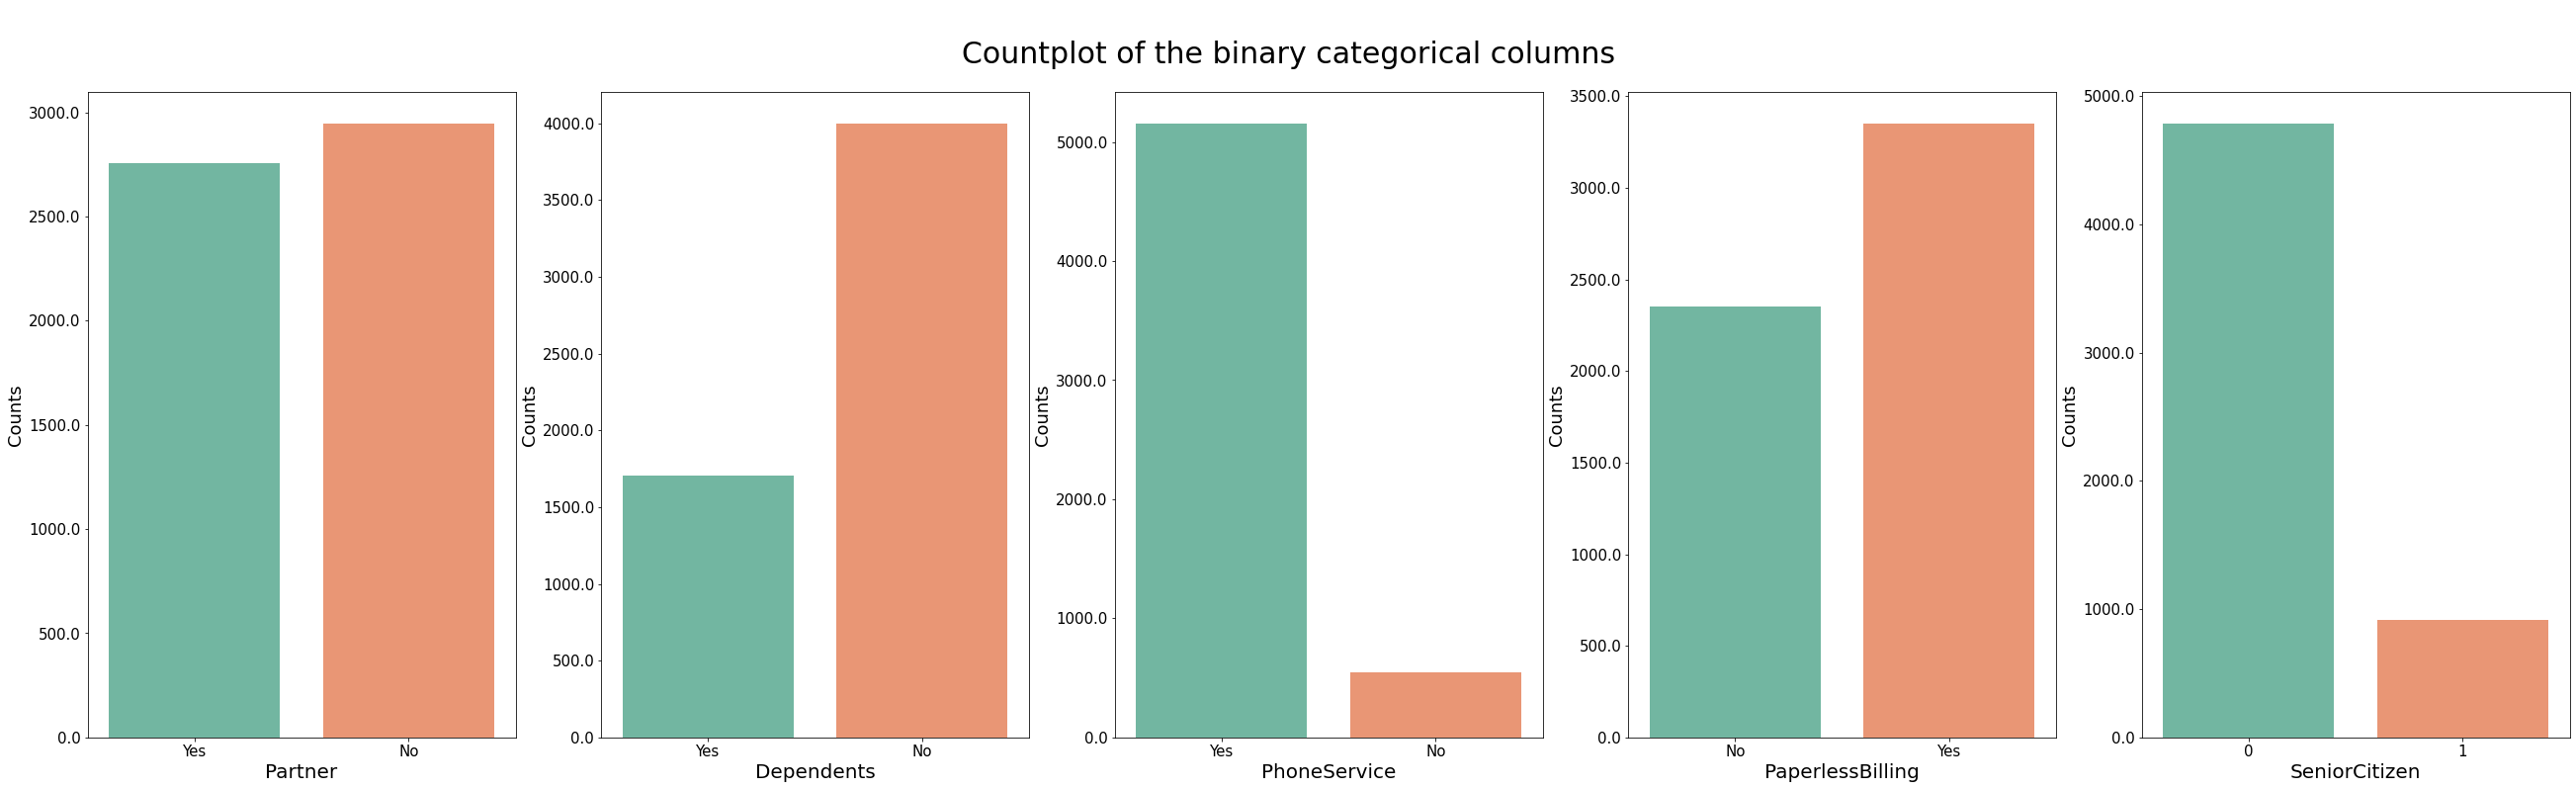

In [41]:
n_rows, n_cols = (1, 5)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 12), sharey=False)
figure.suptitle('\nCountplot of the binary categorical columns\n', fontsize=30)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(binary_cats):
    fig = sns.countplot(x=train_data[cols], ax=axes[j],
                      palette=sns.color_palette("Set2"),)
    axes[j].set_xlabel(cols, fontsize=20)
    axes[j].set_ylabel('Counts', fontsize=18)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=15)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    fig.set_yticklabels(fig.get_yticks(), size = 15)



# plt.tight_layout()
plt.show()

>>> Looks like most of the customers don't have **dependencies**(children, parent etc), uses **phoneservice**, uses **paperlessbilling** and are not **seniorcitizen**, the **partner** columns is kind of shared.

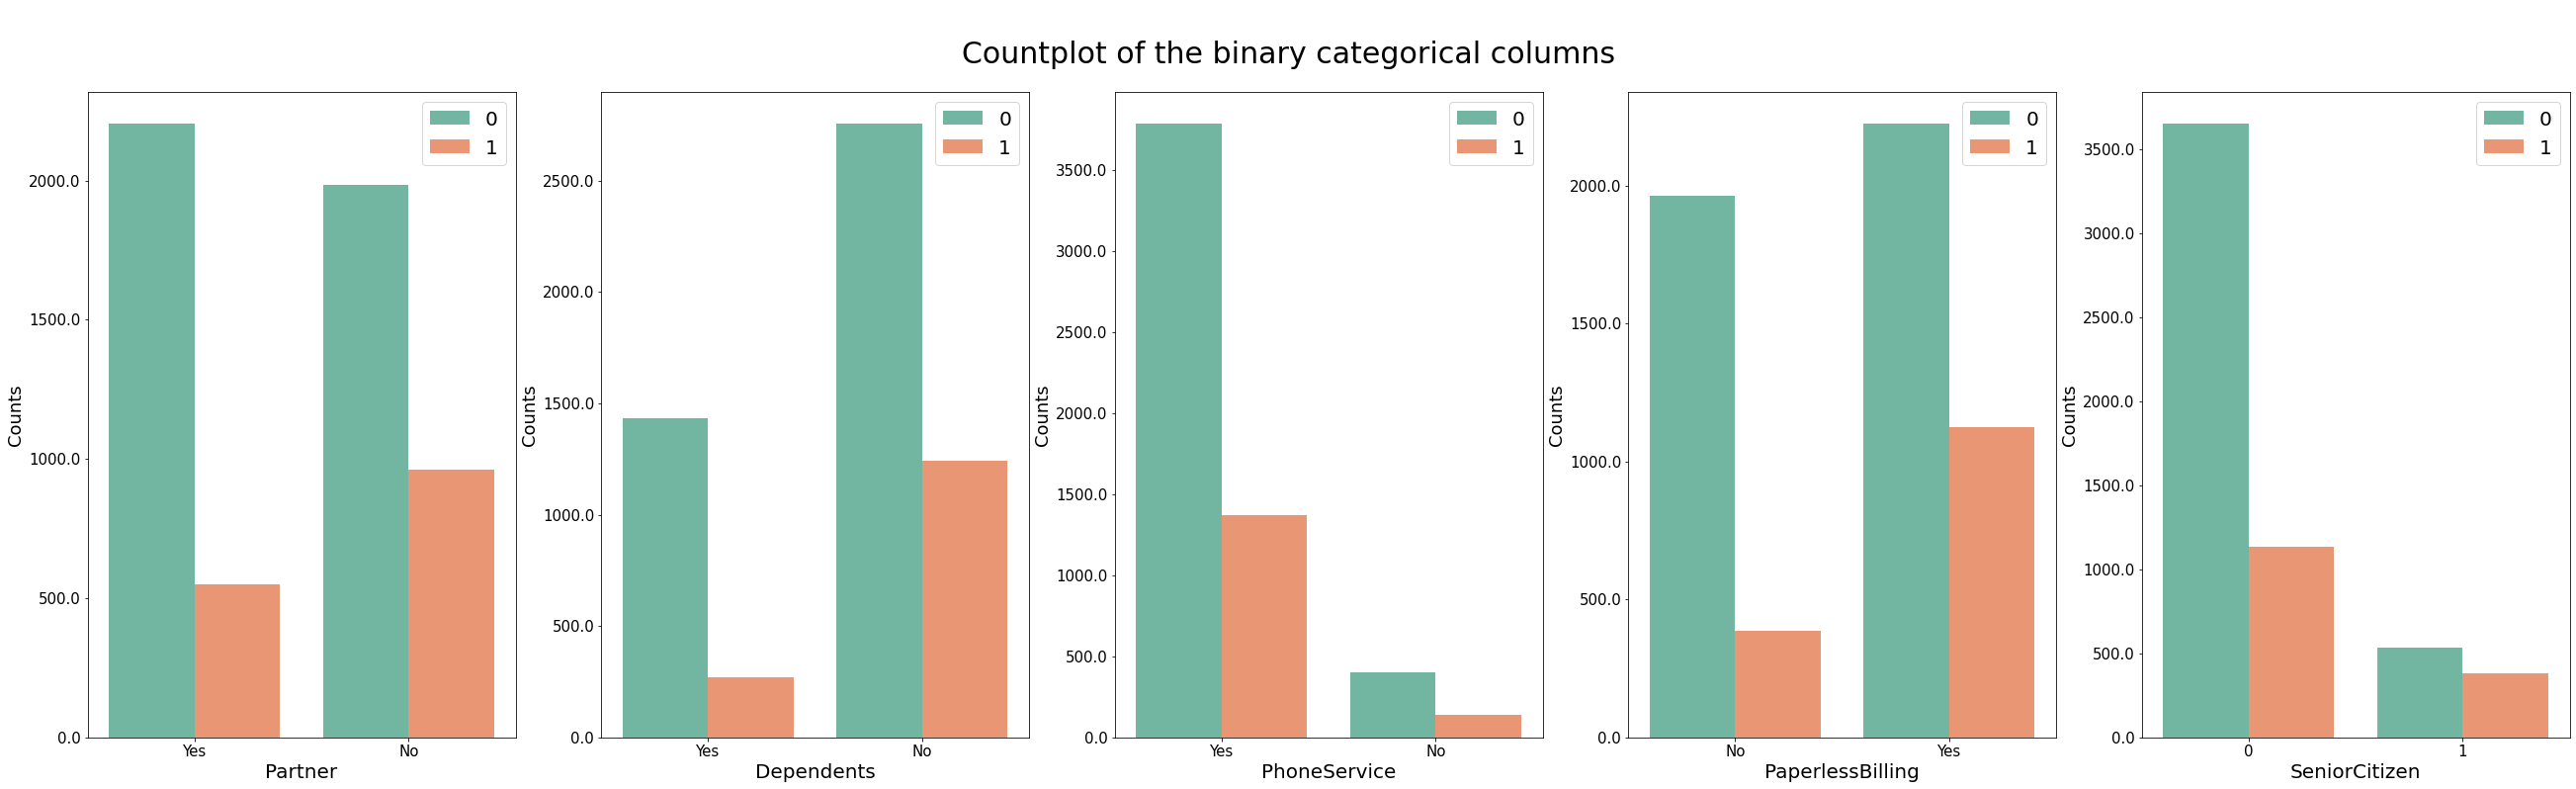

In [42]:
n_rows, n_cols = (1, 5)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 12), sharey=False)
figure.suptitle('\nCountplot of the binary categorical columns\n', fontsize=30)
# axes = axes.flatten()
i = 0
for j, cols in enumerate(binary_cats):
    fig = sns.countplot(x=train_data[cols], ax=axes[j],
                      palette=sns.color_palette("Set2"), hue=train_data['churn'])
    axes[j].set_xlabel(cols, fontsize=20)
    axes[j].set_ylabel('Counts', fontsize=18)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=15)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    axes[j].legend(fontsize=20)
    fig.set_yticklabels(fig.get_yticks(), size = 15)



# plt.tight_layout()
plt.show()

In [80]:
for bin_cols in binary_cats:
    print(train_data.groupby(bin_cols)['churn'].sum())
    print("--" * 70)
    print(train_data.groupby(bin_cols)['churn'].value_counts())
    print("--" * 70)
    print(train_data.groupby(bin_cols)['churn'].mean())
    print("\n")

Partner
No     963
Yes    550
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Partner  churn
No       0        1985
         1         963
Yes      0        2206
         1         550
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Partner
No     0.326662
Yes    0.199565
Name: churn, dtype: float64


Dependents
No     1243
Yes     270
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Dependents  churn
No          0        2758
            1        1243
Yes         0        1433
            1         270
Name: churn, dtype: int64
-------------------------------------------------------------------------------------------------------------

>>> People tend to churn less if they haave **partners**, **dependents**, **don't** use **paperlessbillling** and are not **seniorcitizens**.

>>>Although, most of the poeple don't have **dependencies**, don't use **phoneservice** and are not **seniorcitizens**

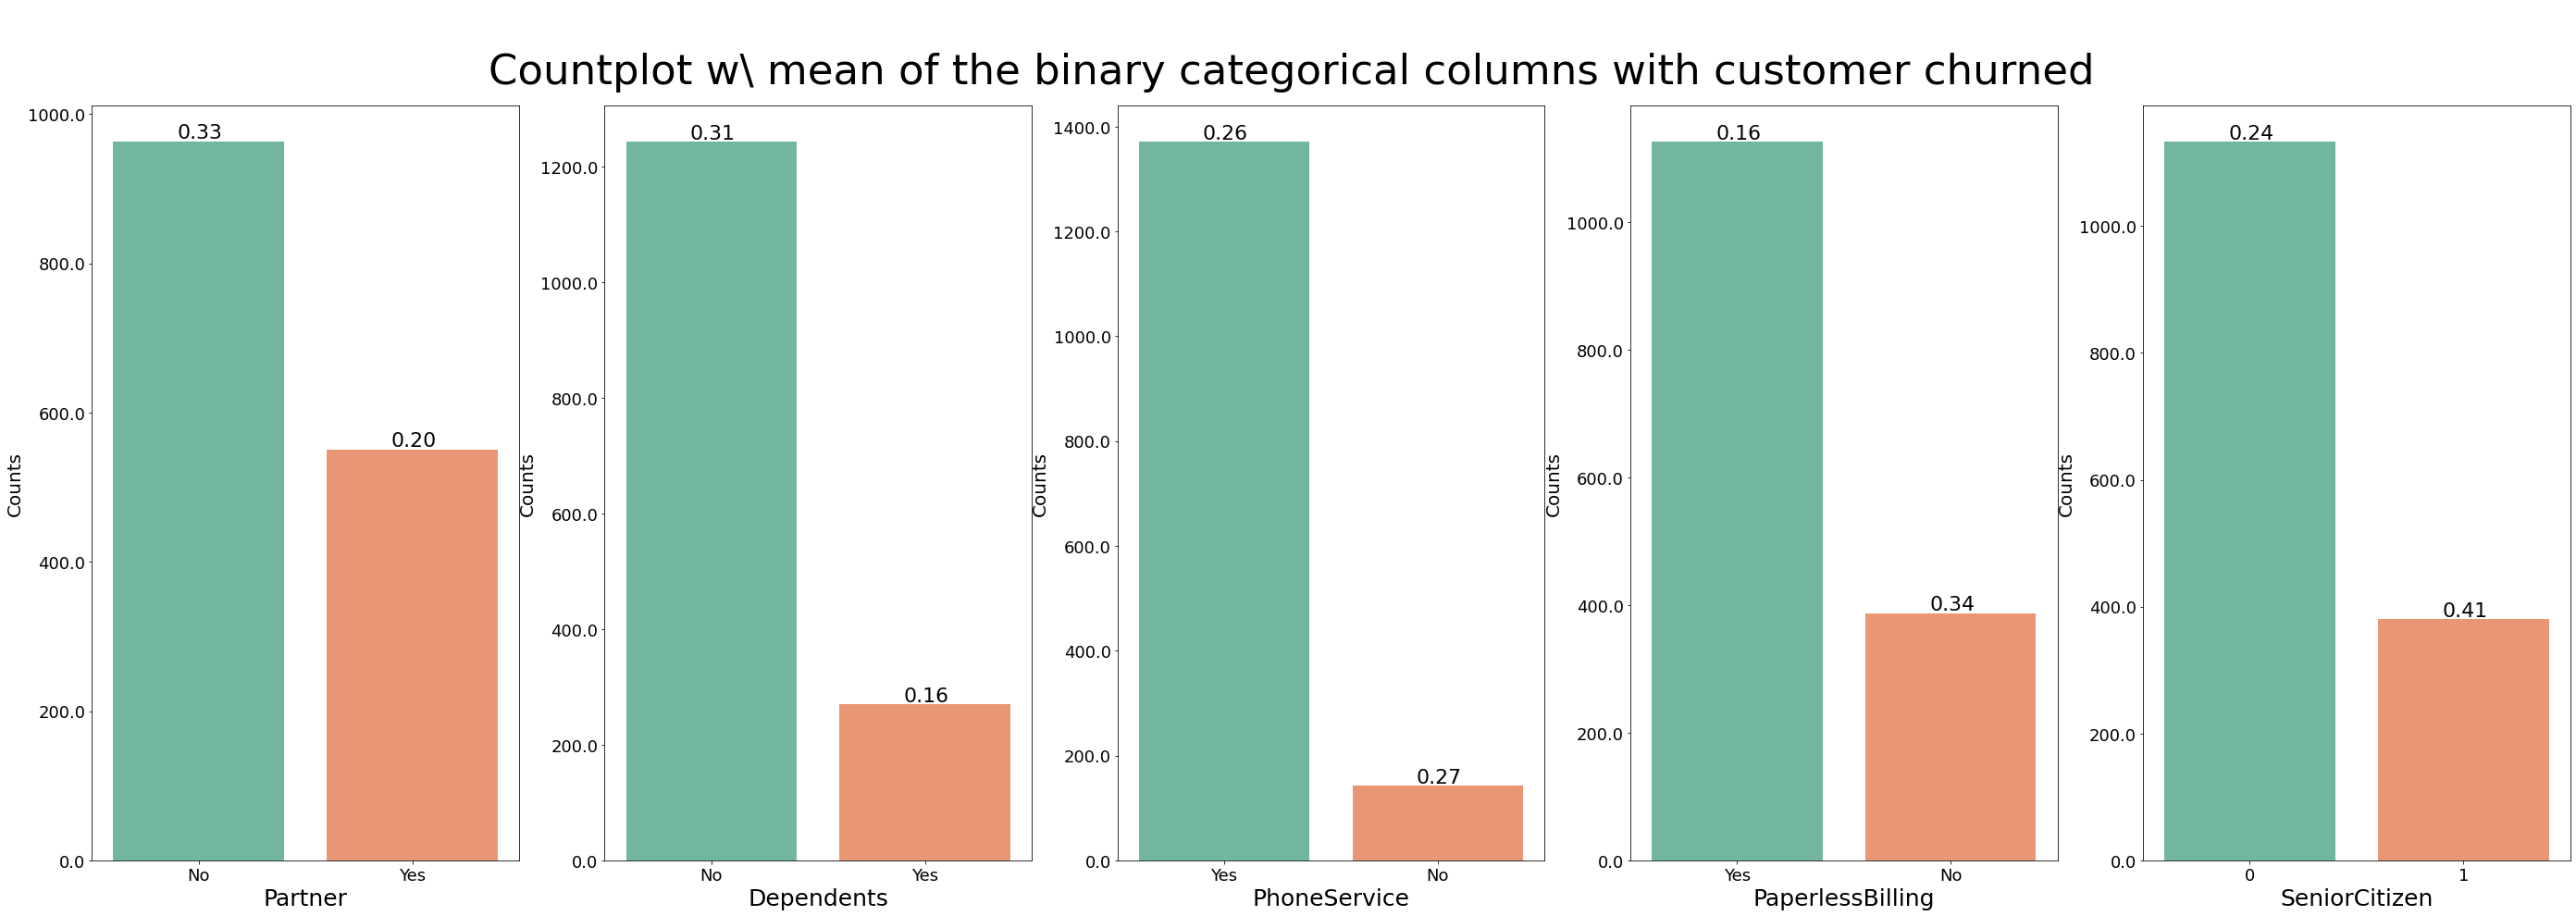

In [44]:
n_rows, n_cols = (1, 5)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(48, 15))
figure.suptitle('\nCountplot w\ mean of the binary categorical columns with customer churned\n\n', fontsize=45)

# i = 0

for j, cols in enumerate(binary_cats):
    churn_mean_rate = train_data.groupby(cols)['churn'].mean().to_list()
    fig = sns.countplot(x=train_data[train_data['churn'] == 1][cols],
                        palette=sns.color_palette("Set2"), ax=axes[j])
    axes[j].set_xlabel(cols, fontsize=25)
    axes[j].set_ylabel('Counts', fontsize=20)
    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=18)
    # fig.set_xticklabels(fig.get_xticks(), size = 15)
    # axes[j].legend(fontsize=20)
    fig.set_yticklabels(fig.get_yticks(), size=18)
    for p, label in zip(axes[j].patches, churn_mean_rate):
        axes[j].annotate("%.2f"%label, (p.get_x()+0.3, p.get_height()+5.0), fontsize=22)

plt.show()

In [76]:
pd.pivot_table(
    data=train_data,
    index=['Partner', 'Dependents'],
    values='churn',
    aggfunc=['mean', 'sum']
)

mean   sum
                       churn churn
Partner Dependents                
No      No          0.338346   900
        Yes         0.218750    63
Yes     No          0.255779   343
        Yes         0.146290   207

In [46]:
print(train_data[(train_data['Partner'] == 'Yes') & (train_data['Dependents'] == 'Yes')]['churn'].value_counts())
print("--" * 70)
print(train_data[(train_data['Partner'] == 'No') & (train_data['Dependents'] == 'No')]['churn'].value_counts())

0    1208
1     207
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
0    1760
1     900
Name: churn, dtype: int64


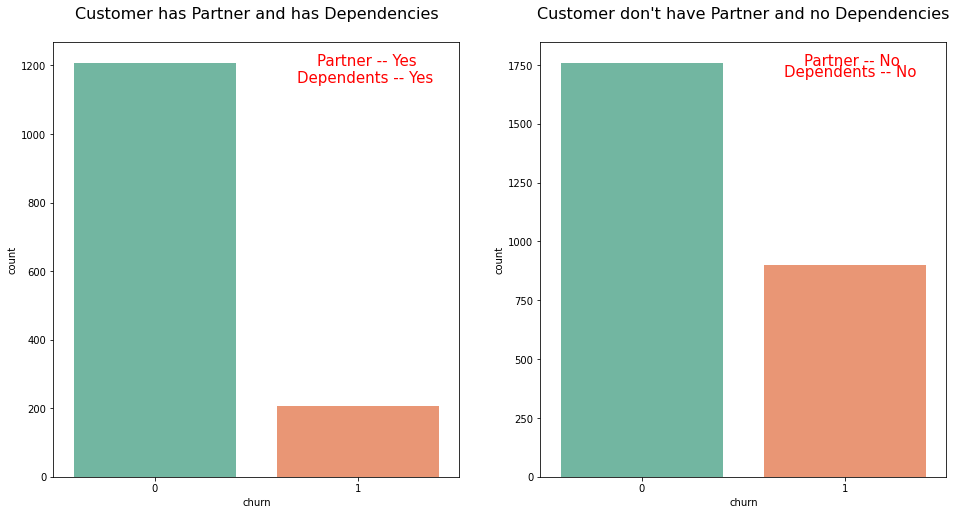

In [71]:
plt.figure(figsize=(16, 8))

plt.subplot(121); 
ax1 = sns.countplot(x=train_data[(train_data['Partner'] == 'Yes') & (train_data['Dependents'] == 'Yes')]['churn'],
               palette=sns.color_palette("Set2"))
ax1.set_title("Customer has Partner and has Dependencies\n", fontsize=16)
ax1.text(0.8, 1200, "Partner -- Yes", fontsize=15, c='r')
ax1.text(0.7, 1150, "Dependents -- Yes", fontsize=15, c='r')

plt.subplot(122);

ax2 = sns.countplot(x=train_data[(train_data['Partner'] == 'No') & (train_data['Dependents'] == 'No')]['churn'],
               palette=sns.color_palette("Set2"))
ax2.set_title("Customer don't have Partner and no Dependencies\n", fontsize=16)
ax2.text(0.8, 1750, "Partner -- No", fontsize=15, c='r')
ax2.text(0.7, 1700, "Dependents -- No", fontsize=15, c='r')

plt.show()

>>> Customer tends to churn more when they don't have partners or have no dependencies.

In [51]:
pd.pivot_table(
    data=train_data,
    index=['SeniorCitizen', 'Dependents'],
    values='churn',
    aggfunc=['mean', 'sum']
)

mean   sum
                             churn churn
SeniorCitizen Dependents                
0             No          0.279276   880
              Yes         0.154551   253
1             No          0.427059   363
              Yes         0.257576    17

In [52]:
print(train_data[(train_data['SeniorCitizen'] == 1) & (train_data['Dependents'] == 'Yes')]['churn'].value_counts())
print("--" * 70)
print(train_data[(train_data['SeniorCitizen'] == 0) & (train_data['Dependents'] == 'No')]['churn'].value_counts())

0    49
1    17
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
0    2271
1     880
Name: churn, dtype: int64


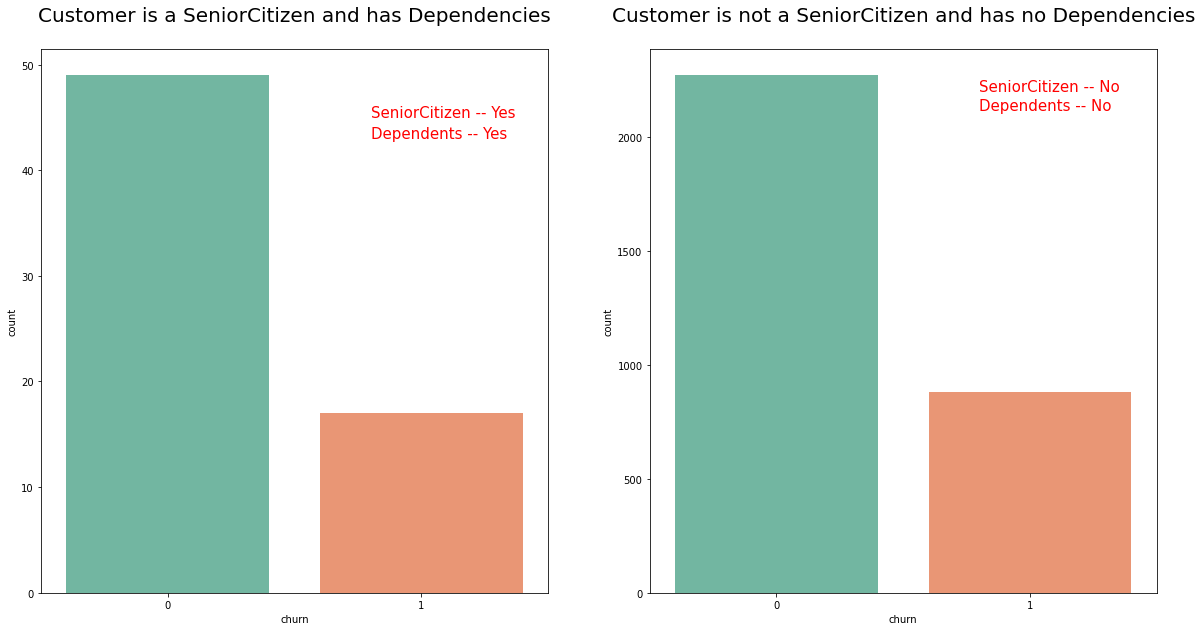

In [68]:
plt.figure(figsize=(20, 10))

plt.subplot(121); 
ax1 = sns.countplot(x=train_data[(train_data['SeniorCitizen'] == 1) & (train_data['Dependents'] == 'Yes')]['churn'],
               palette=sns.color_palette("Set2"))
ax1.set_title("Customer is a SeniorCitizen and has Dependencies\n", fontsize=20)
ax1.text(0.8, 45, "SeniorCitizen -- Yes", fontsize=15, c='r')
ax1.text(0.8, 43, "Dependents -- Yes", fontsize=15, c='r')

plt.subplot(122);

ax2 = sns.countplot(x=train_data[(train_data['SeniorCitizen'] == 0) & (train_data['Dependents'] == 'No')]['churn'],
               palette=sns.color_palette("Set2"))
ax2.set_title("Customer is not a SeniorCitizen and has no Dependencies\n", fontsize=20)
ax2.text(0.8, 2200, "SeniorCitizen -- No", fontsize=15, c='r')
ax2.text(0.8, 2120, "Dependents -- No", fontsize=15, c='r')

plt.show()

>>> There's actually not a lot of differences here, only **2%**. There are not a lot of customers who are Senior Citizen, so it's quite normal that the percentage of having dependencies while being a Senior Citizen in this dataset is low.  

In [77]:
# binary_cats[:-1]

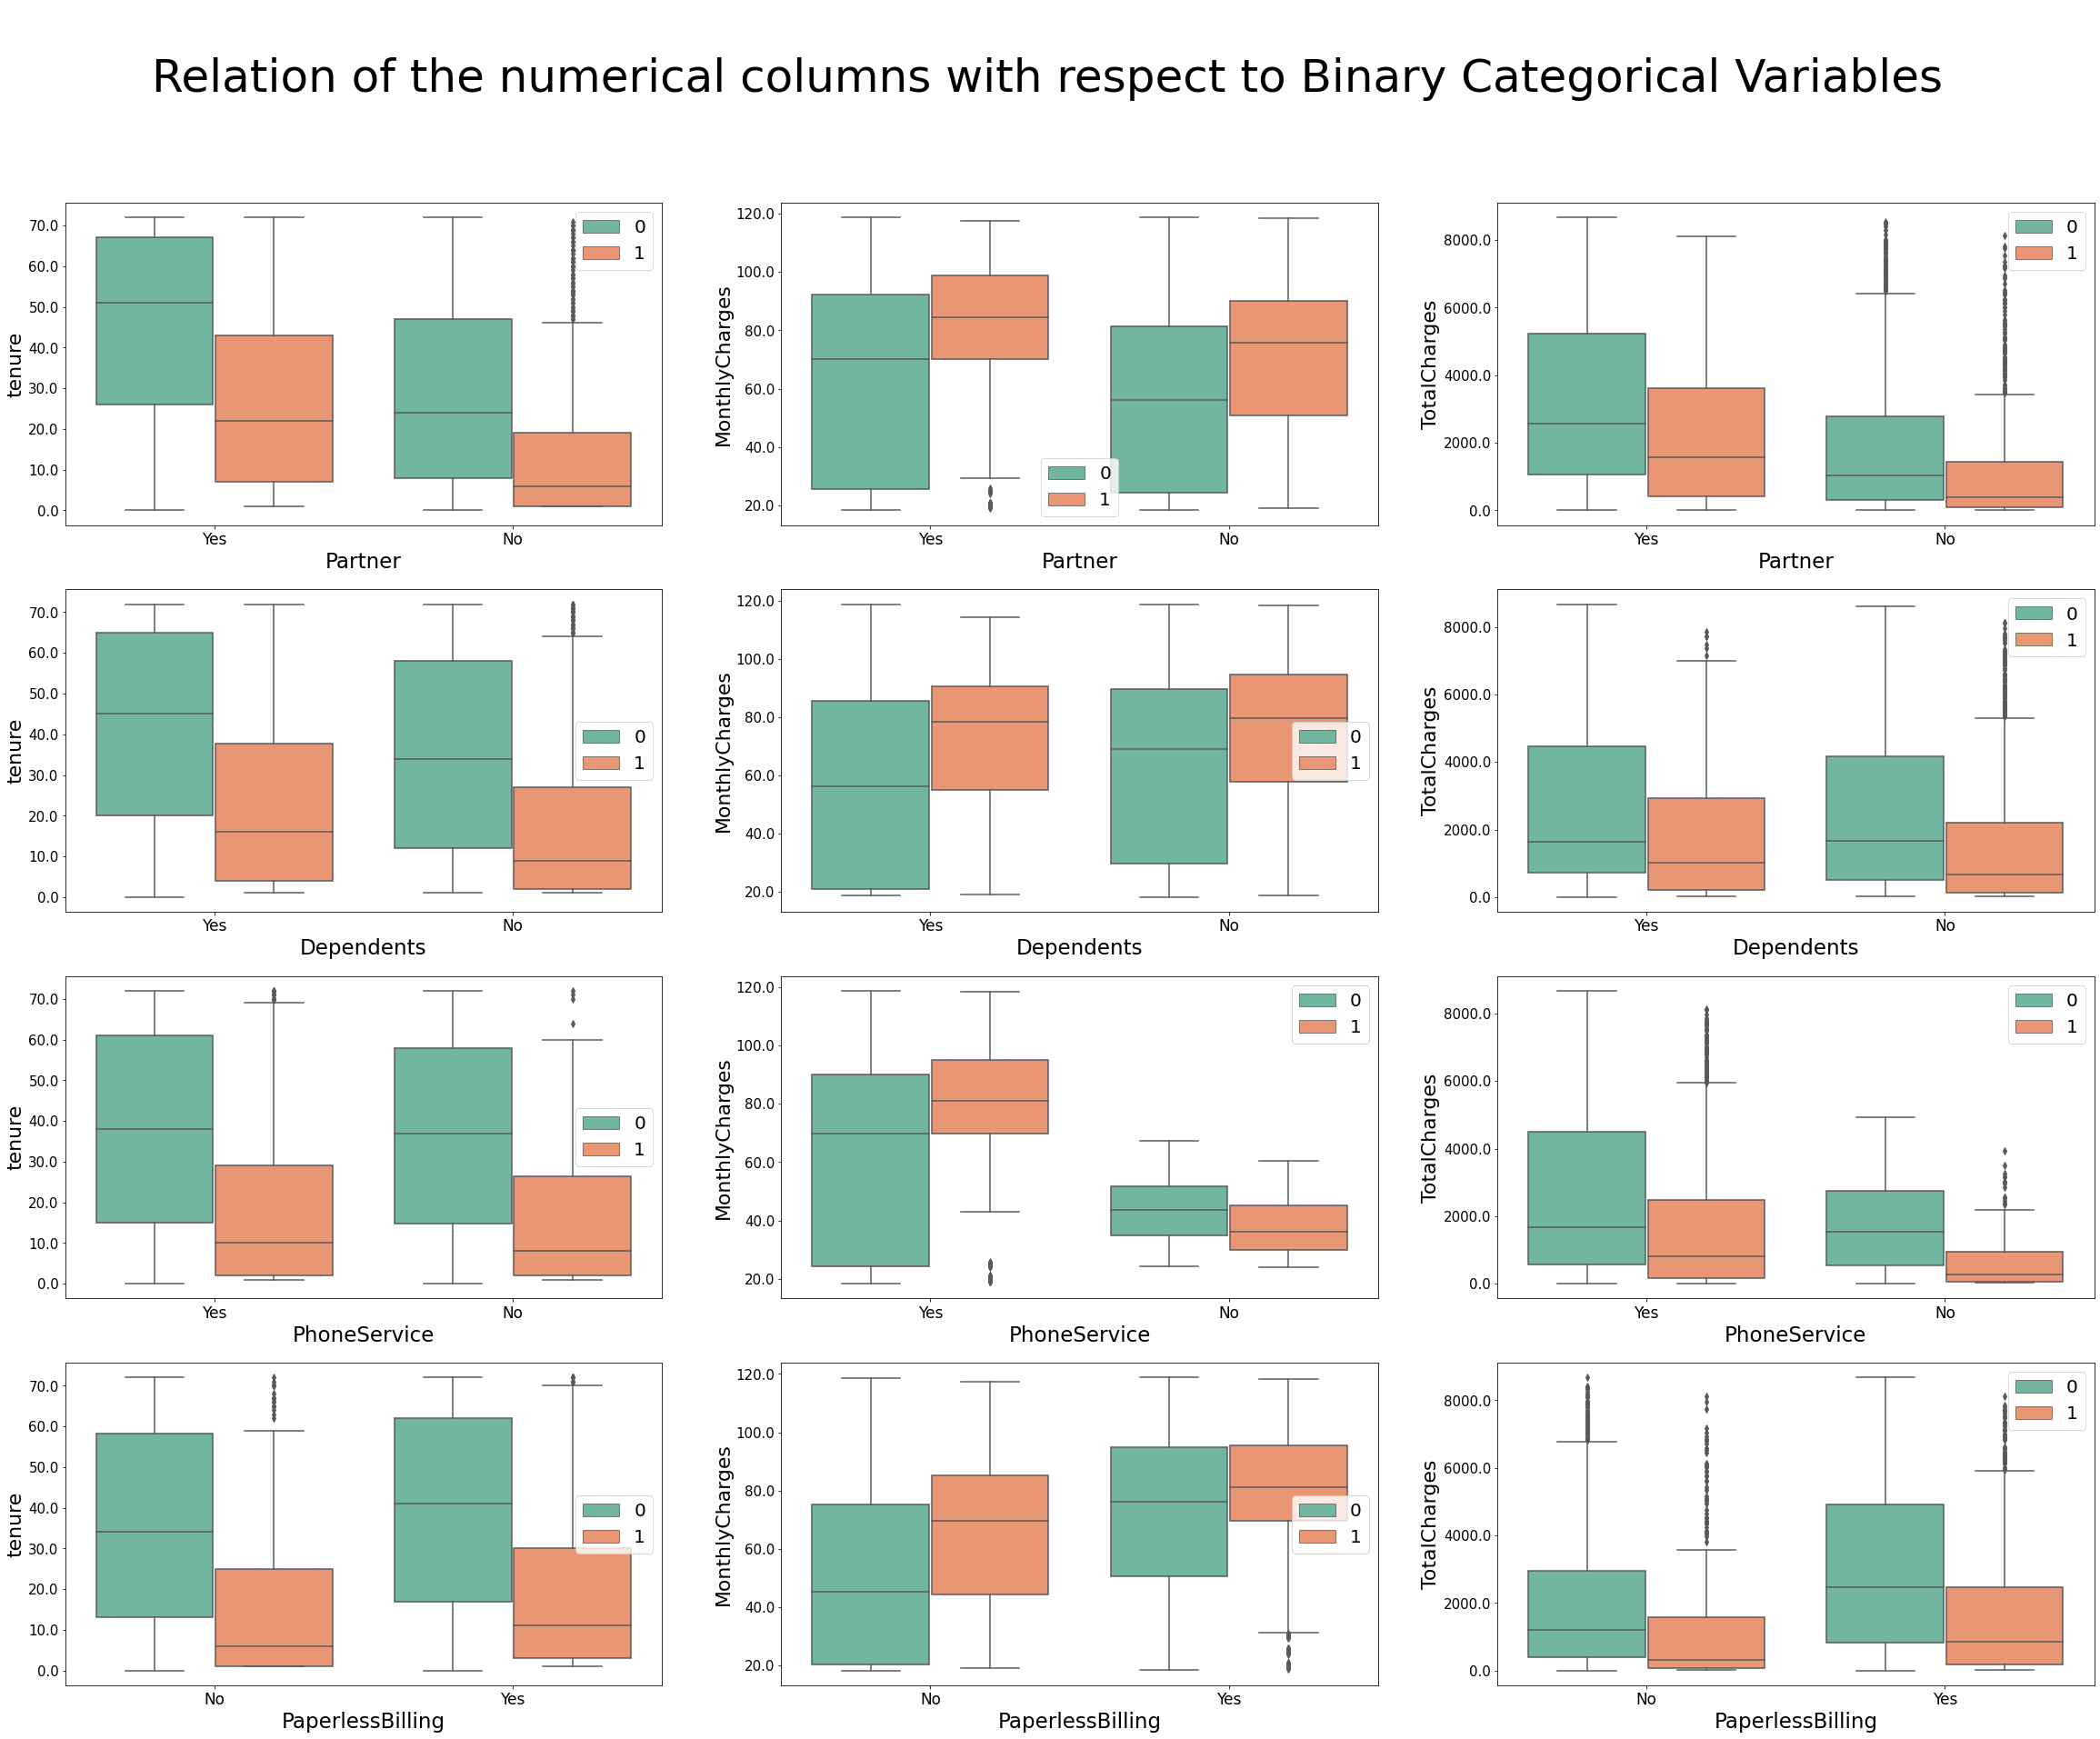

In [86]:
n_rows, n_cols = (4, 3)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 30))
figure.suptitle('\nRelation of the numerical columns with respect to Binary Categorical Variables\n', fontsize=50)
# axes = axes.flatten()

for i, cat_cols in enumerate(binary_cats[:-1]):
    for j, num_cols in enumerate(numericals):
        fig = sns.boxplot(x=train_data[cat_cols], y=train_data[num_cols], ax=axes[i, j],
                        palette=sns.color_palette("Set2"), hue=train_data['churn'],)
        axes[i, j].set_xlabel(cat_cols, fontsize=23)
        axes[i, j].set_ylabel(num_cols, fontsize=22)
        axes[i, j].legend(fontsize=20)
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), fontsize=17)
        axes[i, j].set_yticklabels(axes[i, j].get_yticks(), fontsize=15)

# show the plot
plt.show()

>>> Therer are a quite lot of outliers here and there, which needs to be investigated (later perhaps)

In [91]:
for cols in binary_cats:
    print("Category: " + cols + "\n")

    print(pd.pivot_table(
        data=train_data,
        index='churn',
        columns=[cols],
        values=['tenure', 'MonthlyCharges', 'TotalCharges'],
        aggfunc=['mean']
    ))
    print("\n" + "--" * 70)

Category: Partner

                  mean                                                  \
        MonthlyCharges            TotalCharges                  tenure   
Partner             No        Yes           No          Yes         No   
churn                                                                    
0            57.271008  64.760562  1812.265365  3194.801428  28.197481   
1            71.231620  79.640091  1102.078660  2307.207091  13.383178   

                    
                    
Partner        Yes  
churn               
0        45.844062  
1        26.581818  

--------------------------------------------------------------------------------------------------------------------------------------------
Category: Dependents

                     mean                                                  \
           MonthlyCharges            TotalCharges                  tenure   
Dependents             No        Yes           No          Yes         No   
churn          

>>> Mean MonthlyCharges are higher for the customers who has churned for all the categories.

>>> Mean TotalCharges are lower for the customers who has churnd for all the catgories. This is related to tenure which indicates total months the customer stayed with the company.

>>> Mean tenure is lower for the customers who has churned all the categories. Churned customer stayed less amount time with the company. 

The assumptions are, when the customer has to pay more monthly charges they tend leave the company early, so the tenure for them with the company is less. And as they stayed with the company for short amount time, the total charges are less than the customers who stayed for longer period of time.

In [79]:
# for bin_cols in binary_cats[:-1]:
#     print(train_data.groupby(bin_cols)['churn'].sum())
#     # print(train_data.groupby(bin_cols)['churn'].value_counts())
#     print("--" * 70)
#     print(train_data.groupby(bin_cols)['churn'].mean())
#     print("\n")

In [ ]:
dependents_table = pd.pivot_table(
                data=train_data,
                index='Dependents',
                values='churn',
                aggfunc='sum'
                )

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=train_data[train_data['churn'] == 1]['Dependents'], palette=sns.color_palette("Set2"))
plt.show()

In [ ]:
fig = px.histogram(x=train_data[train_data['churn'] == 1]['Dependents'], 
                   labels={"x":'Dependents', "y":'Churned count'}, text_auto=True,
                   height=500, width=700,
                   )
fig.show()


In [ ]:
dependents_table.plot(kind='bar')

In [ ]:
table = pd.pivot_table(
    data=train_data,
    index=['churn', 'Partner'],
    values=['tenure', 'MonthlyCharges', 'TotalCharges'],
    aggfunc=['count', 'mean']
)

In [ ]:
table

So, having a partner has it's perks

In [ ]:
table = pd.pivot_table(
    data=train_data,
    index=['churn', 'Dependents'],
    values=['tenure', 'MonthlyCharges', 'TotalCharges'],
    aggfunc=['count', 'mean']
)

In [ ]:
table

In [ ]:
table = pd.pivot_table(
    data=train_data,
    index=['churn', 'PhoneService'],
    values=['tenure', 'MonthlyCharges', 'TotalCharges'],
    aggfunc=['count', 'mean']
)

table

In [ ]:
table = pd.pivot_table(
    data=train_data,
    index=['churn', 'PaperlessBilling'],
    values=['tenure', 'MonthlyCharges', 'TotalCharges'],
    aggfunc=['count', 'mean']
)

table

In [ ]:
train_data['TotalCharges'].groupby(train_data['churn']).mean()

In [ ]:
print(train_data.groupby('Partner')['churn'].value_counts())
print("\n")
print(train_data.groupby('Partner')['churn'].mean())

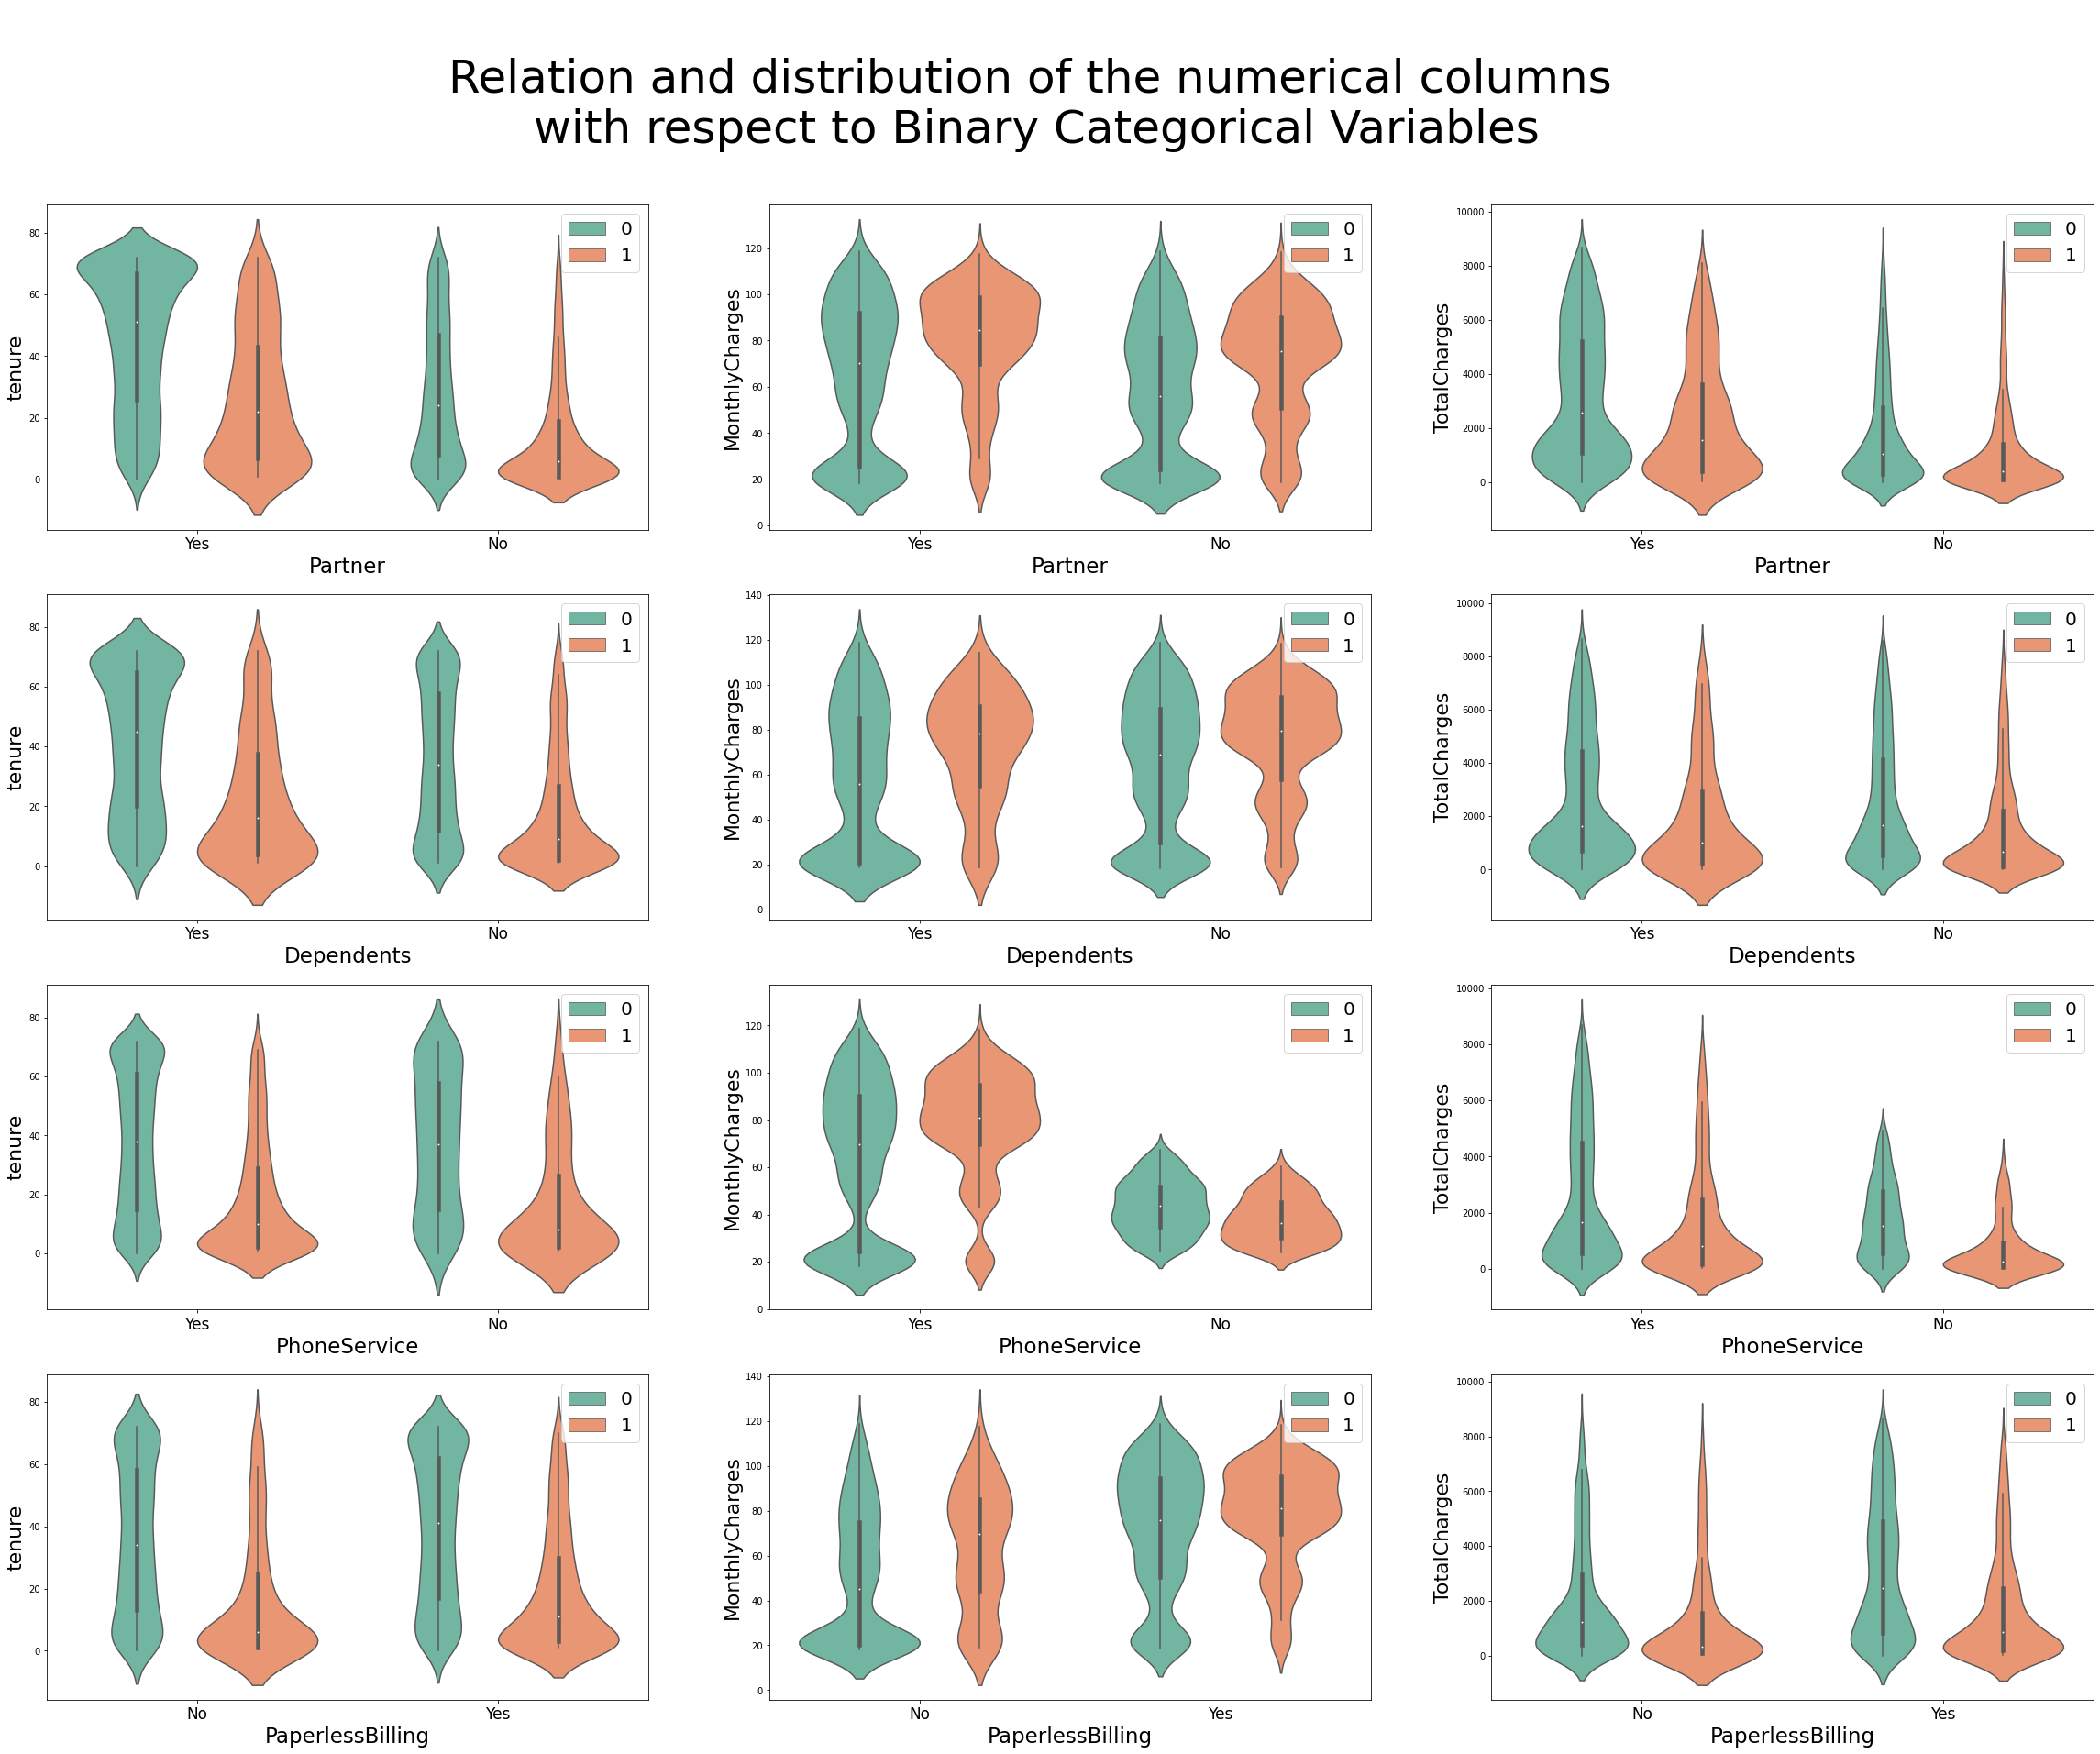

In [ ]:
n_rows, n_cols = (4, 3)    # define number of rows and number of cols of the figure

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 30))
figure.suptitle('\nRelation and distribution of the numerical columns \nwith respect to Binary Categorical Variables\n', fontsize=50)
# axes = axes.flatten()

for i, cat_cols in enumerate(binary_cats[:-1]):
    for j, num_cols in enumerate(numericals):
        fig = sns.violinplot(x=train_data[cat_cols], y=train_data[num_cols], ax=axes[i, j],
                        palette=sns.color_palette("Set2"), hue=train_data['churn'])
        axes[i, j].set_xlabel(cat_cols, fontsize=23)
        axes[i, j].set_ylabel(num_cols, fontsize=22)
        axes[i, j].legend(fontsize=20)
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), fontsize=17)

# show the plot
plt.show()

# Rough

This is computed by grouping **SeniorCitizen** and **churn** columns, grouping by the **churn** column, there are two categories for SeniorCitizen, *0* and *1*, so the funciton counts the total number of observations for each categories and divides them by the sum of total **churned** or simply (churn = 1) values for the respected categories.

so the mean is,

$mean$ = $$\frac{total~observation~of~resptected~category}{total~number~churned~in~that~respected~category}$$

In [ ]:
print(train_data[['SeniorCitizen', 'churn']].groupby('SeniorCitizen').mean())
print("--" * 80)
print(train_data[['SeniorCitizen', 'churn']].groupby('churn').mean())

                  churn
SeniorCitizen          
0              0.236633
1              0.414847
----------------------------------------------------------------------------------------------------------------------------------------------------------------
       SeniorCitizen
churn               
0           0.127893
1           0.251157


In [ ]:
print(train_data[['SeniorCitizen', 'churn']].groupby('SeniorCitizen').mean().value_counts())

churn   
0.236633    1
0.414847    1
dtype: int64


In [ ]:
# print(train_data.groupby('churn')['SeniorCitizen'].value_counts())
# print("--" * 80)
print(train_data.groupby('SeniorCitizen')['churn'].value_counts())

SeniorCitizen  churn
0              0        3655
               1        1133
1              0         536
               1         380
Name: churn, dtype: int64


In [ ]:
print(train_data.groupby('SeniorCitizen')['churn'].value_counts(normalize=True).loc[:, 0])
print("--" * 70)
print(train_data.groupby('SeniorCitizen')['churn'].value_counts(normalize=True).loc[:, 1])

SeniorCitizen
0    0.763367
1    0.585153
Name: churn, dtype: float64
--------------------------------------------------------------------------------------------------------------------------------------------
SeniorCitizen
0    0.236633
1    0.414847
Name: churn, dtype: float64


In [ ]:
# table_sc = pd.pivot_table(
#     data=train_data,
#     index=['SeniorCitizen'],
#     values=train_data['churn'],
#     columns=train_data['churn'],
#     aggfunc='count'
# )

In [ ]:
train_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churn'],
      dtype='object')

In [ ]:
# pivot_sc = pd.pivot_table(
#     data=train_data, 
#     index=['SeniorCitizen'],
#     columns=['TechSupport', 'OnlineBackup'],
#     values=['MonthlyCharges', 'TotalCharges', 'tenure', 'churn'],
#     aggfunc={'MonthlyCharges':np.mean, 'tenure':np.mean, 'churn':np.sum}
# )

In [ ]:
# pivot_sc

In [ ]:
pivot_sc = pd.pivot_table(
    data=train_data, 
    index=['SeniorCitizen', 'TechSupport', 'OnlineBackup'],
    values=['MonthlyCharges', 'TotalCharges', 'tenure', 'churn'],
    aggfunc={'MonthlyCharges':np.mean, 'tenure':np.mean, 'churn':np.sum}
)

<Figure size 720x576 with 0 Axes>

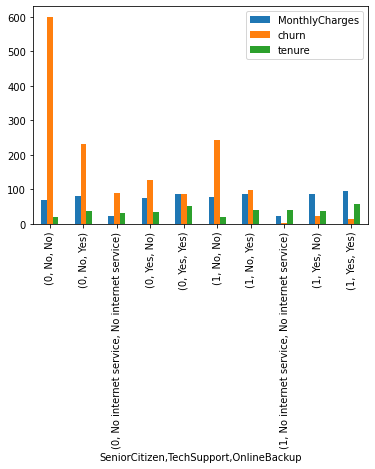

In [ ]:
plt.figure(figsize=(10, 8))

pivot_sc.plot(kind='bar')

In [ ]:
train_data[train_data['churn'] == 0].groupby('SeniorCitizen').mean()

,tenure,MonthlyCharges,TotalCharges,churn
SeniorCitizen,,,,
0,36.972367,58.543611,2409.577798,0.0
1,40.988806,79.417631,3429.238526,0.0


In [ ]:
train_data[train_data['churn'] == 1].groupby('SeniorCitizen').mean()

,tenure,MonthlyCharges,TotalCharges,churn
SeniorCitizen,,,,
0,17.353045,72.254943,1453.267829,1.0
1,20.650000,80.350658,1799.245263,1.0


In [ ]:
pivot_sc = pd.pivot_table(
    data=train_data, 
    index=['churn', 'SeniorCitizen'],
    values=['MonthlyCharges', 'TotalCharges', 'tenure'],
    aggfunc=['sum', np.mean],
    margins=True
)

In [ ]:
pivot_sc

sum                                mean  \
                    MonthlyCharges TotalCharges  tenure MonthlyCharges   
churn SeniorCitizen                                                      
0     0                  213976.90   8807006.85  135134      58.543611   
      1                   42567.85   1838071.85   21970      79.417631   
1     0                   81864.85   1646552.45   19661      72.254943   
      1                   30533.25    683713.20    7847      80.350658   
All                      368942.85  12975344.35  184612      64.681425   

                                             
                    TotalCharges     tenure  
churn SeniorCitizen                          
0     0              2409.577798  36.972367  
      1              3429.238526  40.988806  
1     0              1453.267829  17.353045  
      1              1799.245263  20.650000  
All                  2274.779865  32.365358

In [ ]:
print(train_data.groupby('churn')['gender'].value_counts())
print("--" * 80)
print(train_data.groupby('gender')['churn'].value_counts())

churn  gender
0      Male      2145
       Female    2046
1      Male       759
       Female     754
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
gender  churn
Female  0        2046
        1         754
Male    0        2145
        1         759
Name: churn, dtype: int64


In [ ]:
print(train_data[train_data['churn'] == 0].groupby('gender').mean())
print("--" * 70)
print(train_data[train_data['churn'] == 1].groupby('gender').mean())

        SeniorCitizen     tenure  MonthlyCharges  TotalCharges  churn
gender                                                               
Female       0.126100  37.774194       61.399780   2574.341520    0.0
Male         0.129604  37.211189       61.035338   2507.214895    0.0
--------------------------------------------------------------------------------------------------------------------------------------------
        SeniorCitizen     tenure  MonthlyCharges  TotalCharges  churn
gender                                                               
Female       0.266578  17.453581       74.706300   1473.721088    1.0
Male         0.235837  18.903821       73.872925   1606.165942    1.0


In [ ]:
pivot_gd = pd.pivot_table(
    data=train_data, 
    index=['churn', 'gender'],
    values=['MonthlyCharges', 'TotalCharges', 'tenure'],
    aggfunc=['count', 'mean'],
    margins=True
)

Not much of an impact for the gender feature on the churn variable

In [ ]:
pivot_gd

count                               mean               \
             MonthlyCharges TotalCharges tenure MonthlyCharges TotalCharges   
churn gender                                                                  
0     Female           2046         2046   2046      61.399780  2574.341520   
      Male             2145         2145   2145      61.035338  2507.214895   
1     Female            754          754    754      74.706300  1473.721088   
      Male              759          759    759      73.872925  1606.165942   
All                    5704         5704   5704      64.681425  2274.779865   

                         
                 tenure  
churn gender             
0     Female  37.774194  
      Male    37.211189  
1     Female  17.453581  
      Male    18.903821  
All           32.365358

In [ ]:
for cols in numericals:
    print(train_data[[cols, 'churn']].groupby('churn').mean())
    print("--" * 40)


          tenure
churn           
0      37.486042
1      18.181097
--------------------------------------------------------------------------------
       MonthlyCharges
churn                
0           61.213255
1           74.288235
--------------------------------------------------------------------------------
       TotalCharges
churn              
0       2539.985373
1       1540.162360
--------------------------------------------------------------------------------


In [ ]:
pivot = pd.pivot_table(
    data=train_data, 
    index=['churn', 'SeniorCitizen'],
    values=['MonthlyCharges', 'TotalCharges', 'tenure'],
    aggfunc=['sum', 'mean'],
)

In [ ]:
pivot

sum                                mean  \
                    MonthlyCharges TotalCharges  tenure MonthlyCharges   
churn SeniorCitizen                                                      
0     0                  213976.90   8807006.85  135134      58.543611   
      1                   42567.85   1838071.85   21970      79.417631   
1     0                   81864.85   1646552.45   19661      72.254943   
      1                   30533.25    683713.20    7847      80.350658   

                                             
                    TotalCharges     tenure  
churn SeniorCitizen                          
0     0              2409.577798  36.972367  
      1              3429.238526  40.988806  
1     0              1453.267829  17.353045  
      1              1799.245263  20.650000

In [ ]:
# using this shows more details
# print(train_data.groupby('churn')['SeniorCitizen'].value_counts())

train_data[['SeniorCitizen', 'churn']].groupby('churn').sum()

,SeniorCitizen
churn,
0,536
1,380


In [ ]:
train_data[['churn','gender', 'TechSupport']].groupby('TechSupport').sum()

,churn
TechSupport,
No,1171
No internet service,92
Yes,250


In [ ]:
pd.pivot_table(
    data=train_data,
    index=['TechSupport'],
    values=['churn', 'tenure', 'MonthlyCharges'],
    aggfunc={'churn':np.mean, 'tenure':np.mean, 'MonthlyCharges':np.mean}
)

,MonthlyCharges,churn,tenure
TechSupport,,,
No,74.311011,0.415248,25.782979
No internet service,21.068640,0.073600,30.719200
Yes,81.425949,0.152999,44.984700


In [ ]:
table = pd.pivot_table(
    data=train_data,
    index=['TechSupport', 'OnlineBackup'],
    values=['churn', 'tenure', 'MonthlyCharges', 'SeniorCitizen'],
    aggfunc=[np.sum, np.mean]
)

In [ ]:
table.columns

MultiIndex([( 'sum', 'MonthlyCharges'),
            ( 'sum',  'SeniorCitizen'),
            ( 'sum',          'churn'),
            ( 'sum',         'tenure'),
            ('mean', 'MonthlyCharges'),
            ('mean',  'SeniorCitizen'),
            ('mean',          'churn'),
            ('mean',         'tenure')],
           )

In [ ]:
table

sum                      \
                                        MonthlyCharges SeniorCitizen churn   
TechSupport         OnlineBackup                                             
No                  No                       125100.15           421   842   
                    Yes                       84456.90           251   329   
No internet service No internet service       26335.80            41    92   
Yes                 No                        53565.40            79   149   
                    Yes                       79484.60           124   101   

                                                         mean                \
                                        tenure MonthlyCharges SeniorCitizen   
TechSupport         OnlineBackup                                              
No                  No                   33987      70.638142      0.237719   
                    Yes                  38721      80.511821      0.239276   
No internet service No internet service  38399      21.068640      0.032800   
Yes                 No                   25150      75.232303      0.110955   
                    Yes                  48355      86.208894      0.134490   

                                                              
                                            churn     tenure  
TechSupport         OnlineBackup                              
No                  No                   0.475438  19.190853  
                    Yes                  0.313632  36.912297  
No internet service No internet service  0.073600  30.719200  
Yes                 No                   0.209270  35.323034  
                    Yes                  0.109544  52.445770

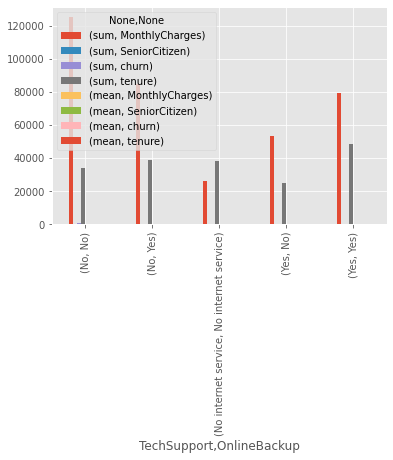

In [ ]:
# plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

table.plot(kind='bar')
plt.show()